# 3. Handling In-Depth Cases

The purpose of this section of teaching is to give you a few in-depth examples as a walkthrough to prepare you for the example work which will be conducted without support.

## Gaussian Elimination

In linear algebra, *Gaussian Elimination* (AKA *row reduction*) is an algorithm for solving **linear systems** of equations $Ax=b$. This method can be used to find the *rank* of a square matrix, calculate the *determinant* and calculate the *inverse* of an invertible square matrix. For example:

$$
\begin{array}{lcl} 
    9x + 3y + 4z & = & 7 \\
    4x + 3y + 4z & = & 8 \\
    x + y + z & = & 3 
\end{array}
$$

can be arranged as:

$$
\mathbf{A}=\left[\begin{array}{ccc|c}
9 & 3 & 4 \\
4 & 3 & 4\\
1 & 1 & 1
\end{array}\right], \qquad 
\mathbf{x} = \left[\begin{array}{ccc|c}
x \\ y \\ z
\end{array}\right], \qquad
\mathbf{b}=\left[\begin{array}{ccc|c}
7 \\ 8 \\ 3
\end{array}\right]
$$

To perform row-reduction, one uses a sequence of **elementary row operations** to modify the matrix until the matrix is in upper-triangular form. There are 3 primary operations:
1. Swapping two rows
2. Multiplying a row by a non-zero number
3. Adding a multiple of one row to another row

e.g: For example consider the matrix

$$
\left[\begin{array}{ccc|c}
9 & 3 & 4 & 7 \\
4 & 3 & 4 & 8 \\
1 & 1 & 1 & 3
\end{array}\right] 
$$

We could begin by swapping the first and third rows, which gives:

$$
\left[\begin{array}{ccc|c}
1 & 1 & 1 & 3 \\
4 & 3 & 4 & 8 \\
9 & 3 & 4 & 7 \\
\end{array}\right]
$$

Next, subtracting 9 times the first row from the third gives:

$$
\left[\begin{array}{ccc|c}
1 & 1 & 1 & 3 \\
4 & 3 & 4 & 8 \\
0 & -6 & -5 & -20 \\
\end{array}\right]
$$

Subtracting 4 times the first row from the second gives:

$$
\left[\begin{array}{ccc|c}
1 & 1 & 1 & 3 \\
0 & -1 & 0 & -4 \\
0 & -6 & -5 & -20 \\
\end{array}\right]
$$

Finally, adding -6 times the second row from the third gives:

$$
\left[\begin{array}{ccc|c}
1 & 1 & 1 & 3 \\
0 & -1 & 0 & -4 \\
0 & 0 & -5 & 4 \\
\end{array}\right]
$$

The final matrix is referred to as *Echelon form*. Note that *Gaussian Elimination* is applied to matrix $A$ and the output vector $b$ simultaenously. Once the matrix is in the final state, we can use another method such as *backward substitution* to solve the linear system trivially.

Here we solve the equation of the $k$th row for $x_k$, then substitute back into the equation of the $(k-1)$st row to obtain a solution for $x_{k-1}$, etc., as:

$$
x_i=\frac{1}{a_{ii}'}\left(b_i' - \sum_{j=i+1}^k a_{ij}'x_j\right)
$$

In [177]:
import numpy as np
A = np.array([[9, 3, 4], [4, 3, 4], [1, 1, 1]], dtype=np.float64)
b = np.array([7, 8, 3], dtype=np.float64)

### Step 1.

It is important to join together $A$ and $b$ at the start of the process: $A + b=A^{*}$

In [178]:
n = len(b)
aug = np.hstack((A, b.reshape(n,1)))
aug

array([[9., 3., 4., 7.],
       [4., 3., 4., 8.],
       [1., 1., 1., 3.]])

### Step 2.

As we can see this joins together $A$ and $b$ into one matrix, ready for elimination. Now we need to loop over the rows, and find the one with the highest *magnitude*, if the current row isn't the maximum, then *swap the rows* until the one with the highest magnitude is closer to the top of the matrix.

In [179]:
max_row = np.argmax(aug[:,0])
max_row

0

### Step 3. Pivoting

If max_row is not 0 (i.e not the top column) then we swap the argmax row with the top one:

In [180]:
if (max_row):
    tmp = np.copy(aug[0,:])
    aug[0,:] = np.copy(aug[max_row,:])
    aug[max_row,:] = tmp

In [181]:
aug

array([[9., 3., 4., 7.],
       [4., 3., 4., 8.],
       [1., 1., 1., 3.]])

### Step 4.

So we have pivoted the top row with the bottom row. Now we want to iterate over all of the rows below our current one (0), and remove the value at the left-most side of the matrix, then scale by the current row:

$$
A^{*}_j = A^{*}_j - \frac{A^{*}_{ji}}{A^{*}_{ii}} A^{*}_i
$$

In [182]:
print("j:{}, {} \n \n".format(0,aug))
for j in range(1, n):
    aug[j,:] = aug[j,:] - (aug[j,0] / aug[0, 0]) * aug[0, :]
    print("j:{}, {} \n \n".format(j,aug))

j:0, [[9. 3. 4. 7.]
 [4. 3. 4. 8.]
 [1. 1. 1. 3.]] 
 

j:1, [[9.         3.         4.         7.        ]
 [0.         1.66666667 2.22222222 4.88888889]
 [1.         1.         1.         3.        ]] 
 

j:2, [[9.         3.         4.         7.        ]
 [0.         1.66666667 2.22222222 4.88888889]
 [0.         0.66666667 0.55555556 2.22222222]] 
 



What we've managed to do is eliminate two of the lower-left hand side terms, making them zero and inducing triangularity. This needs to be repeated for all $i$.

## Tasks

### Task 1.

Write the algorithm `gaussian_elimination()` which accepts $A$ and $b$, and returns the reduced matrix $A^{*}$ and reduced vector $b^{*}$. Use the example at the beginning of this section as input to see if you get the same output. **Note: you shouldn't!**

In [184]:
# your codes here

### Task 2.

*Backward substitution* can be performed on an upper-triangular matrix $A^{*}$ with known outputs $b^{*}$ to discover the unknown weights $\bf x^{*}$. This is achieved by iterately going up the matrix, substituting known $\bf x^{*}$ values at the previous step into matrix $A^{*}$ and calculating new $\bf x^{*}$. You should expect $x=-1/5$, $y=4$ and $z=-4/5$, within $\bf x^{*}$.

Write the `backward_substitution()` algorithm that determines $x$, $y$, and $z$ within $\bf x$.

In [183]:
# your codes here

## Finite Elements

The finite element method (FEM) or analysis (FEA) is a *numerical method* for solving many engineering domain problems. It's areas include structural analysis, heat transfer and fluid flow around an object. 

The method yields approximate values of the unknowns using a discrete number of points over the domain of the object in question. To solve the problem, it integrates by parts, dividing a large problem into smaller, simpler objects that are called *Finite Elements*. The simple equations that model the finite elements are then assembled into larger systems of equations to model the entire problem. 

### 1D problem

The temperature $T$ of a bar of length 1 at equilibrium satisfies:

$$
\partial_{xx}T + f(x)=0
$$

The heat source is given by $f(x)$. We'll hold the temperature fixed at the right edge by setting $T(1)=0$. We'll allow heat to conduct through the left edge by setting $\partial_xT(0)=0$.

We need a way of handling the second-derivative term, so we can introduce a weighting function $w(x)$ and integrate by parts to get:

$$
  \left[ \partial_x T(x) w(x) \right]_0^1 - \int_0^1 \text{d}x \, \partial_x T(x) \partial_x w(x) = - \int_0^1 \text{d}x \, f(x) w(x).
$$

and after factoring the boundary conditions we get:

$$
\int_0^1 \text{d}x\partial_xT(x)\partial_xw(x)=\int_0^1 \text{d}xw(x)f(x)
$$

This is considered the **weak form** of the problem.

### Step 1. A simple 3-node example

To get an approximate solution, we split the domain into intervals/elements. Let's begin with a simple example where we choose $[0, 1/2]$ and $[1/2, 1]$, which means there are nodes at $\{0, 1/2, 1\}$. To repesent this, we'll introduce some *shape functions* $N_A(x)$ and write:

$$
T(x)=\sum_A T_AN_A(x)
$$

here $A$ is a counter associated with the nodes, so $A=\{0,1,2\}$: the nodes are $x_A$. The shape function $N_A(x)=1$ at the associated node, and $0$ at all other nodes. In this case, let's choose the shape functions to be piecewise linear, which are shape functions look as:

$$
\begin{align}
  N_0(x) &= \begin{cases} 1 - 2 x, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  N_1(x) &= \begin{cases} 2 x, & 0 \le x \le 1/2 \\ 2 - 2 x, & 1/2 \le x \le 1, \end{cases}, \\
  N_2(x) &= \begin{cases} 0, & 0 \le x \le 1/2 \\ 2 x - 1, & 1/2 \le x \le 1. \end{cases}
\end{align}
$$

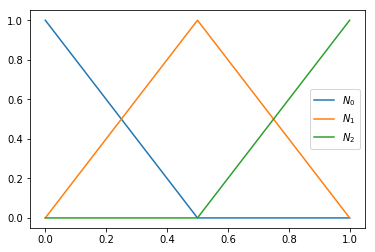

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(0.,1.,1000)
# we use np.where to select x <= 0.5, then replace true with top function, false with bottom function
N0 = np.where(x <= .5, 1-2*x, np.zeros_like(x))
N1 = np.where(x <= .5, 2*x, 2-2*x)
N2 = np.where(x <= .5, np.zeros_like(x), 2*x-1)
plt.plot(x, N0, label='$N_0$')
plt.plot(x, N1, label='$N_1$')
plt.plot(x, N2, label='$N_2$')
plt.legend()
plt.show()

We can now write out the weak form of this problem as:

$$
  \sum_A \sum_B T_A w_B \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x) = \sum_B w_B \int_0^1 \text{d}x \, N_A(x) f(x).
$$

This has to be true for *any* choice of weight function, so for *any* coefficients $w_B$. This is true only if

$$
  \sum_A T_A \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x) = \int_0^1 \text{d}x \, N_B(x) f(x).
$$

which can be written as a linear system matrix problem:

$$
KT=F
$$

The coefficients of the **stiffness matrix** $K$ are given as:

$$
  K_{AB} = \int_0^1 \text{d}x \, \partial_x N_A(x) \partial_x N_B(x).
$$

The coefficients of the **force vector** $F$ are given by

$$
  F_{A} = \int_0^1 \text{d}x \, N_A(x) f(x).
$$

In order to calculate the **stiffness** matrix and **force** vectors, we need to calculate the derivatives of the shape functions:

$$
\begin{align}
  \partial_x N_0(x) &= \begin{cases} - 2, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  \partial_x N_1(x) &= \begin{cases} 2, & 0 \le x \le 1/2 \\ - 2, & 1/2 \le x \le 1, \end{cases}, \\
  \partial_x N_2(x) &= \begin{cases} 0, & 0 \le x \le 1/2 \\ 2, & 1/2 \le x \le 1. \end{cases}
\end{align}
$$

Therefore the product $\partial_xN_A\partial_xN_B$ required for calculating the stiffness matrix is either $0$ or $\pm 4$:

$$
\begin{align}
  \partial_x N_0(x) \partial_x N_0(x) &= \begin{cases} 4, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  \partial_x N_0(x) \partial_x N_1(x) &= \begin{cases} -4, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  \partial_x N_1(x) \partial_x N_0(x) &= \begin{cases} -4, & 0 \le x \le 1/2 \\ 0, & 1/2 \le x \le 1, \end{cases}, \\
  \partial_x N_1(x) \partial_x N_1(x) &= \begin{cases} 0, & 0 \le x \le 1/2 \\ 4, & 1/2 \le x \le 1. \end{cases}
\end{align}
$$

This gives:

$$
K_{AB}= \begin{pmatrix} 2 & -2 \\ -2 & 4 \end{pmatrix}
$$

Meanwhile, the force vector is

$$
\begin{align}
  F_0 &= \int_0^{1/2} \text{d}x \, x - 2 x^2 \\ &= \frac{1}{8} - \frac{1}{12} = \frac{1}{24}, \\
  F_1 &= \int_0^{1/2} \text{d}x \, 2 x^2 + \int_{1/2}^1 \text{d}x \, 2x - 2 x^2 \\ &= \frac{1}{12} + 1 - \frac{2}{3} - \frac{1}{4} + \frac{1}{12} = \frac{1}{4}.
\end{align}
$$


### Step 2.

We will demonstrate this by computing analytically the **stiffness** matrix and **force vector** using *sympy*:

In [11]:
import sympy as smp
smp.init_printing()

In [12]:
x = smp.symbols("x")
N = [
    smp.Piecewise((1-2*x, x <=1/2), (0, x > 1/2)),
    smp.Piecewise((2*x, x<=1/2), (2-2*x, x>1/2)),
    smp.Piecewise((0, x<1/2), (2*x-1, x>1/2))
]
K = np.zeros((2,2))
for A in range(2):
    for B in range(2):
        K[A,B] = smp.integrate(smp.diff(N[A], x)*smp.diff(N[B], x), (x, 0 , 1))
print(K)

[[ 2. -2.]
 [-2.  4.]]


And now for the force vector:

In [13]:
f = lambda x : x
F = np.zeros(2)
for A in range(2):
    F[A] = smp.integrate(N[A] * f(x), (x, 0, 1))
print(F)

[0.04166667 0.25      ]


And finally we will **numerically** solve $KT=F$.

In [14]:
T_A = np.linalg.solve(K,F)

N_num = []
for A, N_A in enumerate(N):
    N_num.append(smp.lambdify((x,), N[A], "numpy"))

def T(x):
    Tvals = np.zeros_like(x)
    for A in range(2):
        Tvals += T_A[A] * N_num[A](x)
    return Tvals

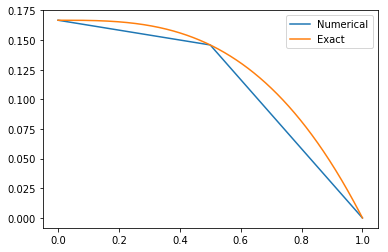

In [15]:
coords = np.linspace(0,1,1000)
plt.plot(coords, T(coords), label="Numerical")
plt.plot(coords, (1-coords**3)/6, label="Exact")
plt.legend()
plt.show()